In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('heart_attack_dataset.csv')

In [3]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [6]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


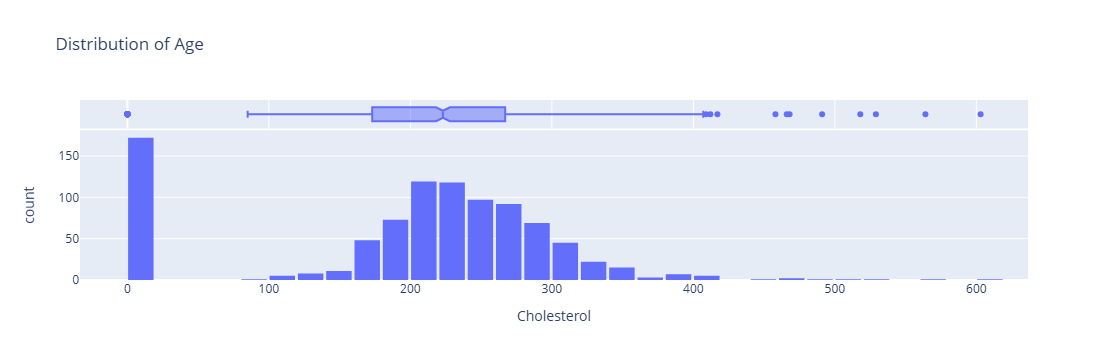

In [9]:
fig = px.histogram(df,
                   x='Cholesterol', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

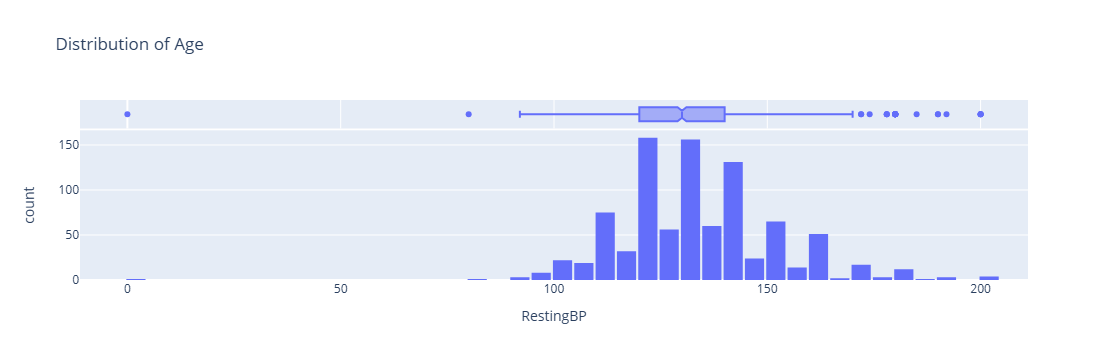

In [8]:
fig = px.histogram(df,
                   x='RestingBP', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

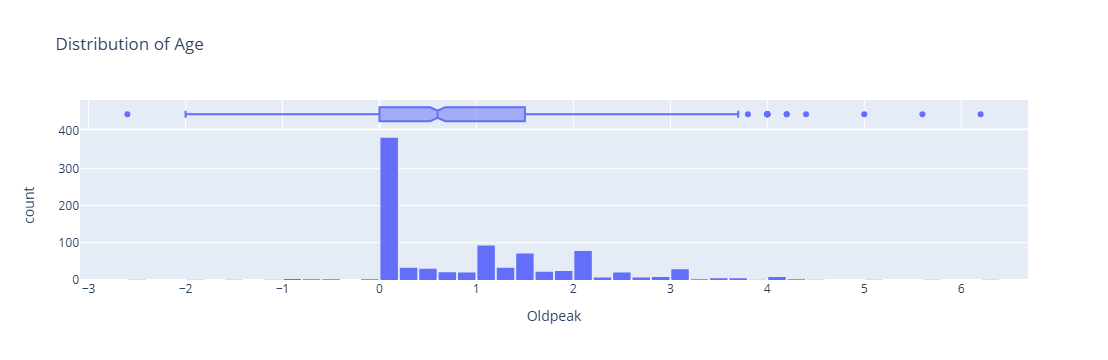

In [11]:
fig = px.histogram(df,
                   x='Oldpeak', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [12]:
# Calculate median of valid Cholesterol values
cholesterol_median = df.loc[(df["Cholesterol"] >= 20) & (df["Cholesterol"] <= 500), "Cholesterol"].median()

# Replace invalid values with median
df.loc[(df["Cholesterol"] < 20) | (df["Cholesterol"] > 500), "Cholesterol"] = cholesterol_median


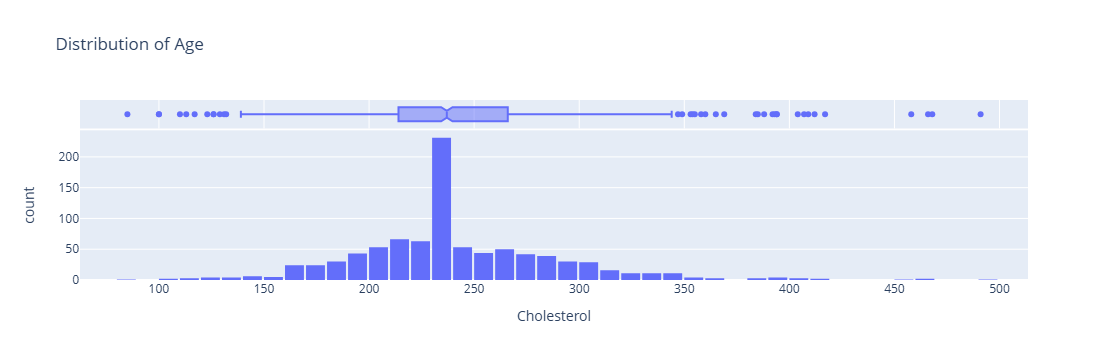

In [13]:
fig = px.histogram(df,
                   x='Cholesterol', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [14]:
# Calculate the median of RestingBP
restingbp_median = df["RestingBP"].median()

# Calculate IQR for RestingBP
Q1 = df["RestingBP"].quantile(0.25)
Q3 = df["RestingBP"].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the median
df.loc[(df["RestingBP"] < lower_bound) | (df["RestingBP"] > upper_bound), "RestingBP"] = restingbp_median


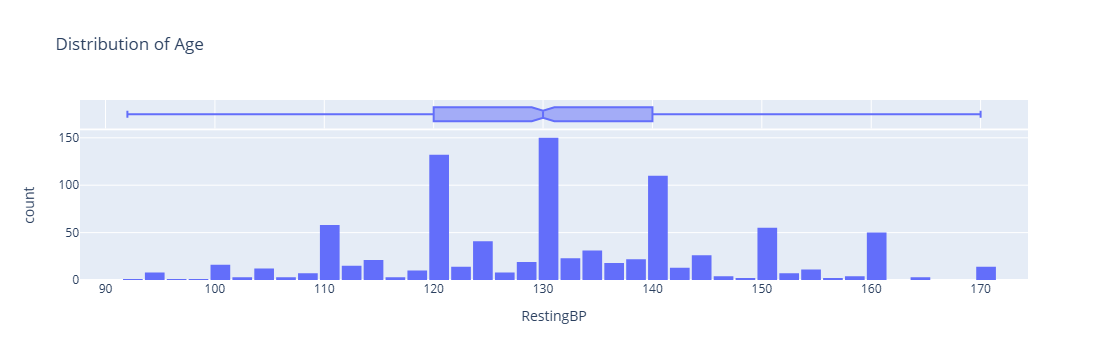

In [15]:
fig = px.histogram(df,
                   x='RestingBP', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [16]:
df.loc[df["Oldpeak"] < 0, "Oldpeak"] = 0.1

In [17]:
df.loc[df["Oldpeak"] >= 4, "Oldpeak"] = 4

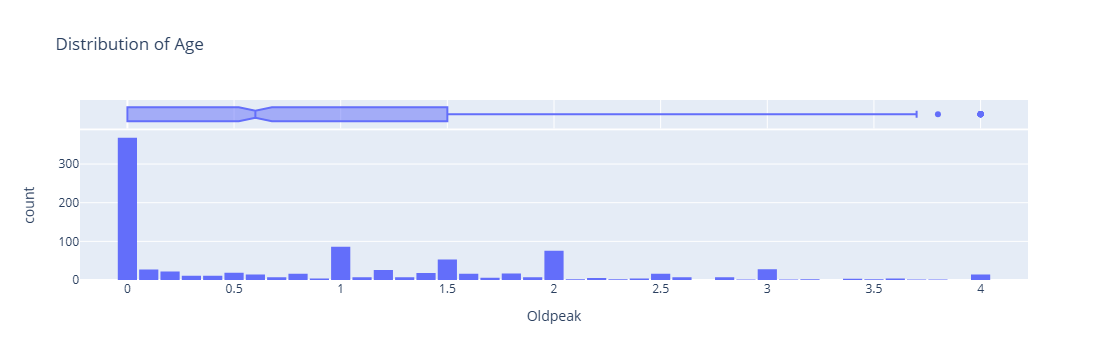

In [18]:
fig = px.histogram(df,
                   x='Oldpeak', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [19]:
from sklearn.model_selection import train_test_split

In [22]:
import numpy as np

In [20]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

In [23]:
numeric_cols = train_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_df.select_dtypes('object').columns.tolist()

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler_heart = MinMaxScaler()
scaler_heart.fit(df[numeric_cols])

MinMaxScaler()

In [26]:
train_df[numeric_cols] = scaler_heart.transform(train_df[numeric_cols])
val_df[numeric_cols] = scaler_heart.transform(val_df[numeric_cols])

In [27]:
input_cols = list(train_df.columns)[:-1]
target_col = 'HeartDisease'

In [28]:
from sklearn.preprocessing import OneHotEncoder

In [29]:
enc_heart = OneHotEncoder()
enc_heart.fit(train_df[categorical_cols])
enc_heart.categories_

[array(['F', 'M'], dtype=object),
 array(['ASY', 'ATA', 'NAP', 'TA'], dtype=object),
 array(['LVH', 'Normal', 'ST'], dtype=object),
 array(['N', 'Y'], dtype=object),
 array(['Down', 'Flat', 'Up'], dtype=object)]

In [30]:
one_hot_heart = enc_heart.transform(df[categorical_cols]).toarray()

In [31]:
encoded_cols = list(enc_heart.get_feature_names_out(categorical_cols))

In [32]:
df[encoded_cols] = one_hot_heart

In [35]:
train_df[encoded_cols] = df[encoded_cols].copy()
val_df[encoded_cols] = df[encoded_cols].copy()

In [40]:
numeric_input_cols = [col for col in input_cols if col in numeric_cols]

In [41]:
X_train = train_df[numeric_input_cols + encoded_cols]
X_val = val_df[numeric_input_cols + encoded_cols]

In [42]:
X_train

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
795,0.285714,0.358974,0.381773,1.0,0.943662,0.20,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
25,0.163265,0.487179,0.305419,0.0,0.830986,0.00,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
84,0.571429,0.743590,0.315271,1.0,0.457746,0.25,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
10,0.183673,0.487179,0.310345,0.0,0.577465,0.00,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
344,0.469388,0.358974,0.374384,1.0,0.309859,0.00,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.408163,0.358974,0.416256,0.0,0.352113,0.00,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
270,0.346939,0.358974,0.344828,0.0,0.563380,0.00,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
860,0.653061,0.487179,0.413793,0.0,0.591549,0.35,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
435,0.653061,0.769231,0.374384,0.0,0.408451,0.00,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
model_heart = LogisticRegression(solver='liblinear')


In [45]:
model_heart.fit(X_train, train_targets)

LogisticRegression(solver='liblinear')

In [47]:
train_preds = model_heart.predict(X_train)

In [48]:
from sklearn.metrics import accuracy_score

accuracy_score(train_targets, train_preds)

0.8610354223433242

In [49]:
val_preds = model_heart.predict(X_val)

In [50]:
accuracy_score(val_preds, val_targets)

0.8586956521739131